In [20]:
import numpy as np
import matplotlib.pyplot as plt
import time
import scipy.stats as st

# Notebook Overview
This notebook repeats most of the tests in the first 24 hour scan analysis, for scan from Tuesday night to Wednesday morning October 12 2021 to October 13 2021.

I'm repeating this test because the ARX settings have been changed to more typical settings.

I copied this notebook from the overnight scan and made some small changes so it's almost ready to run when the data-taking finishes.

## Summary of interesting details

big spike is time index 526 = Tuesday October 12 8:45pm (pacific time)

time at the end when most antennas fall off is 1426 = 12:00:53 pm Wednesday October 14 (Pacific time)

Antennas 48(digital input 63, antenna 247B) and 49 ((digital input 62, antenna 247A) stand out for kurtosis at 1377  11:10:46 am Wednesday October 13 (Pacific time).

Antennas with reliably low power are:

32(digital input 47, antenna 239B), 

41(digital input 38, antenna 235A), 

43 (digital input 36, antenna 236A), 

61(digital input 50, antenna 241A).

Antenna 26 has lower standard deviation (digital input 21, antenna 228 B).


In [81]:
Nsnapshot=1440
fbins=np.linspace(0,197/2,int(1+4096/2))
timebins = (1/60)*np.asarray(range(Nsnapshot))

Things to come back to:



## Inspect the first and last snapshots in the scan

In [31]:
with open("/home/ubuntu/kplant/caltech-lwa/cosmic_ray_scripts/data_capture/24hour_scan10-12-2021_ls.txt") as f:
    fnames=f.readlines()
basename="/home/ubuntu/kplant/caltech-lwa/cosmic_ray_scripts/data_capture/snapshots/24hour_scan10-12-2021/"


In [121]:
#snapshot=np.load("/home/ubuntu/kplant/caltech-lwa/cosmic_ray_scripts/data_capture/snapshots/single_board_snapshot1634084160.4791412.npy")

snapshot=np.load(basename+fnames[0][:-1])
print(len(fnames))

1440


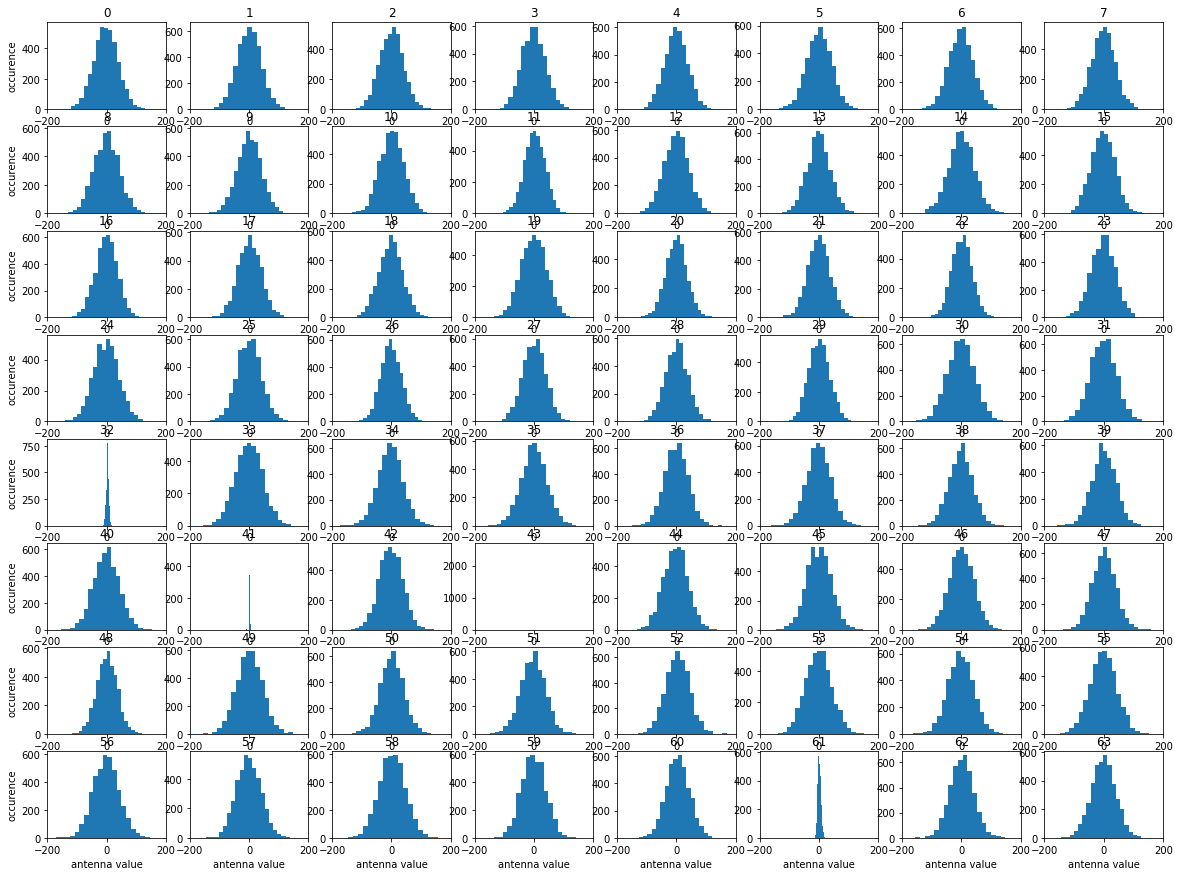

In [122]:
#plot histogram
plt.figure(figsize=(20,15))
for i in range(64):
    plt.subplot(8,8,1+i)
    plt.title(str(i))
    plt.hist(snapshot[:,i+4],20)
    plt.xlim(-200,200)
    if i > 55:
        plt.xlabel('antenna value')
    if i%8==0:
        plt.ylabel('occurence')

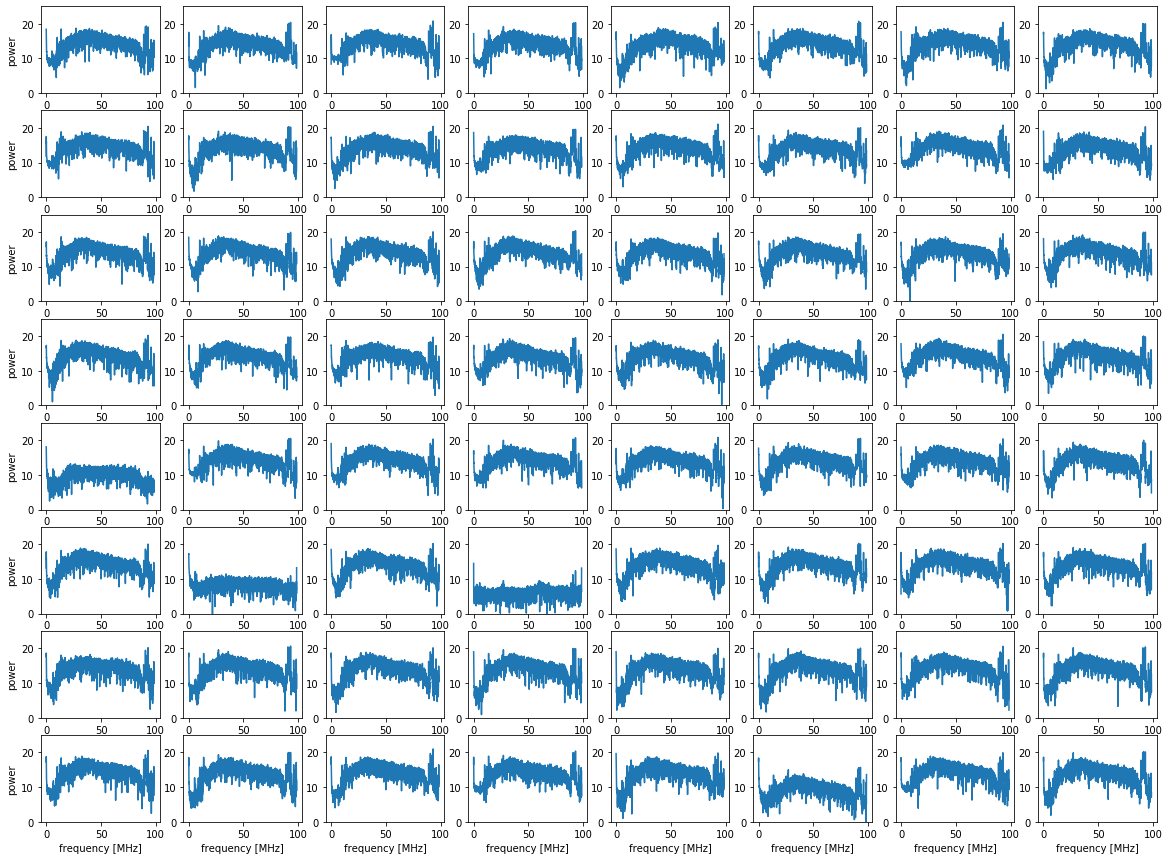

In [35]:
#plot spectra
fbins=np.linspace(0,197/2,int(1+4096/2))

plt.figure(figsize=(20,15))
for i in range(64):
    plt.subplot(8,8,1+i)
    spec=np.fft.rfft(snapshot[:,i+4])
    plt.plot(fbins,np.log(np.square(np.abs(spec))))
    plt.ylim(0,25)
    if i > 55:
        plt.xlabel('frequency [MHz]')
    if i%8==0:
        plt.ylabel('power')

### Last snapshot


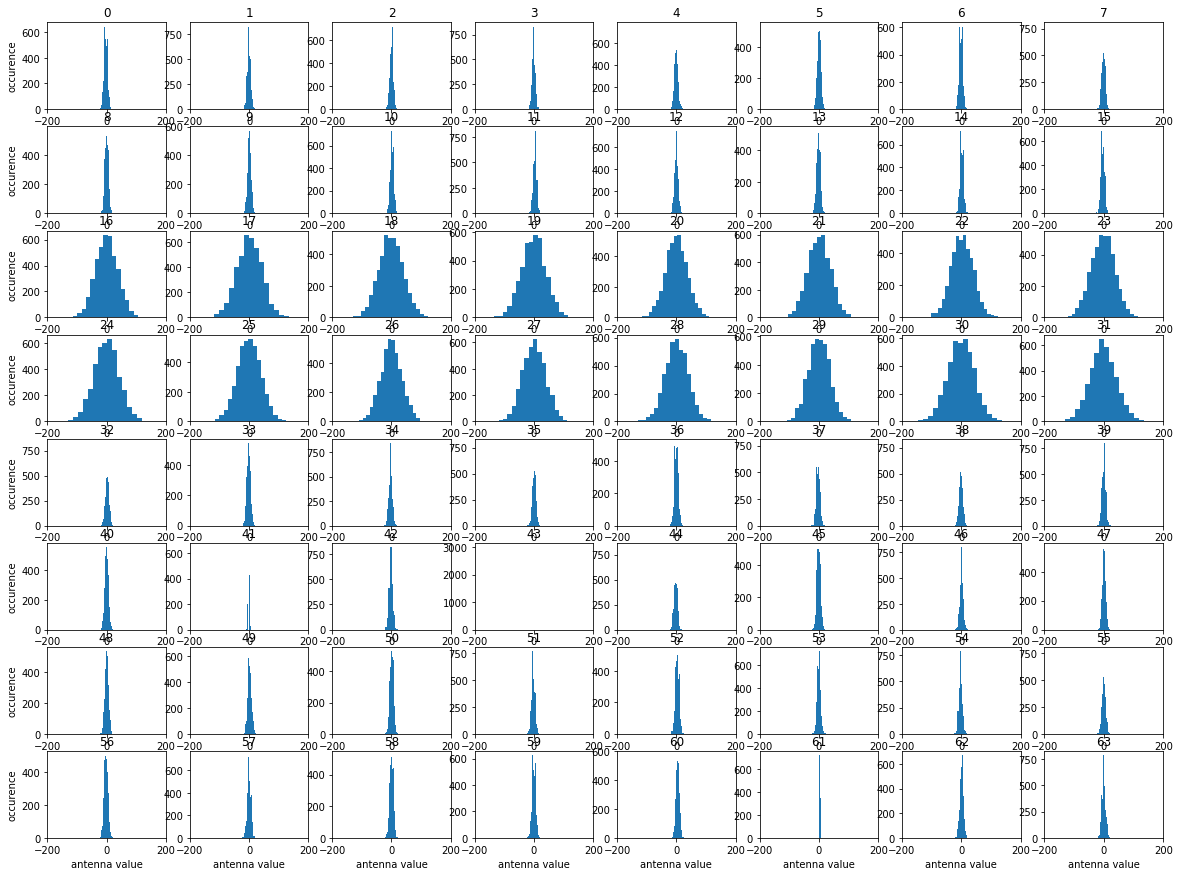

In [37]:
snapshot=np.load(basename+fnames[-1][:-1])
#plot histogram
plt.figure(figsize=(20,15))
for i in range(64):
    plt.subplot(8,8,1+i)
    plt.title(i)
    plt.hist(snapshot[:,i+4],20)
    plt.xlim(-200,200)
    if i > 55:
        plt.xlabel('antenna value')
    if i%8==0:
        plt.ylabel('occurence')

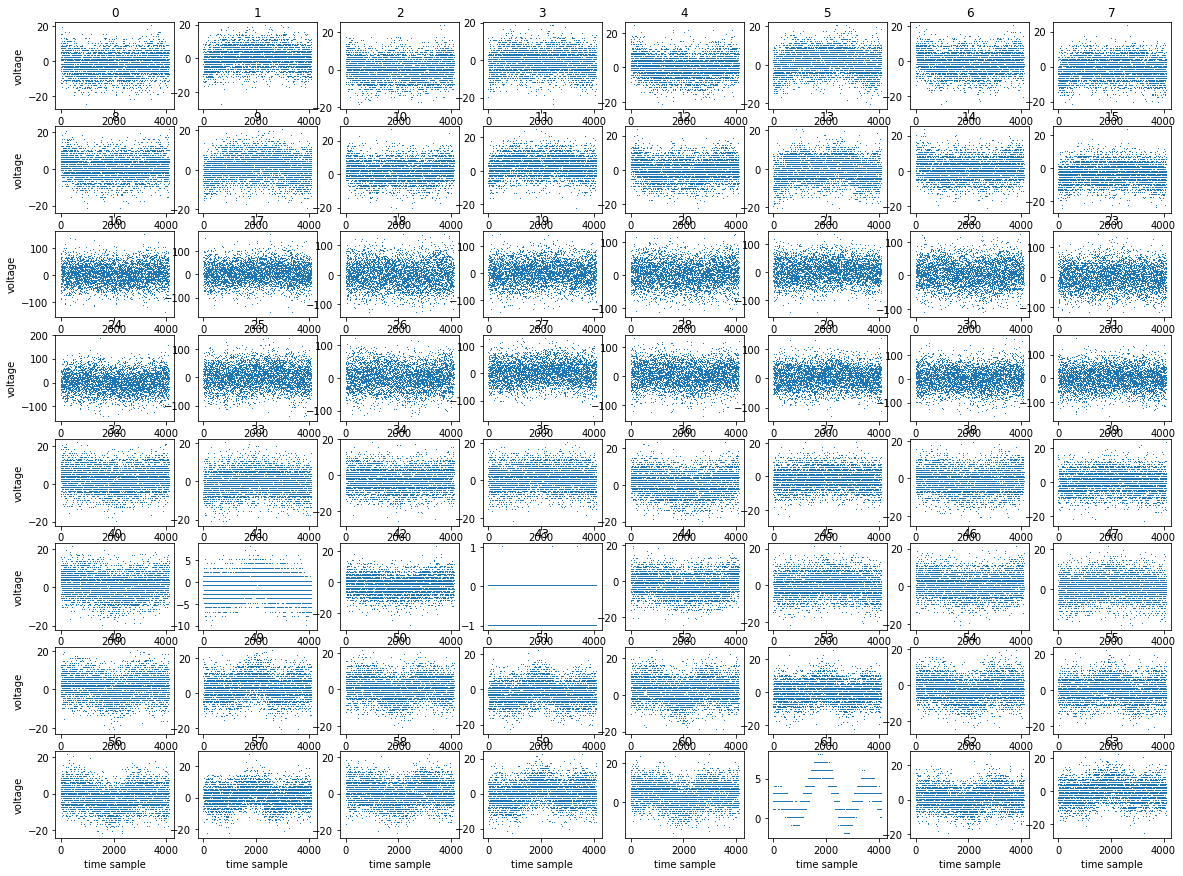

In [38]:
#plot timeseries
plt.figure(figsize=(20,15))
for i in range(64):
    plt.subplot(8,8,1+i)
    plt.title(i)
    plt.plot(snapshot[:,i+4],',')
    if i > 55:
        plt.xlabel('time sample')
    if i%8==0:
        plt.ylabel('voltage')

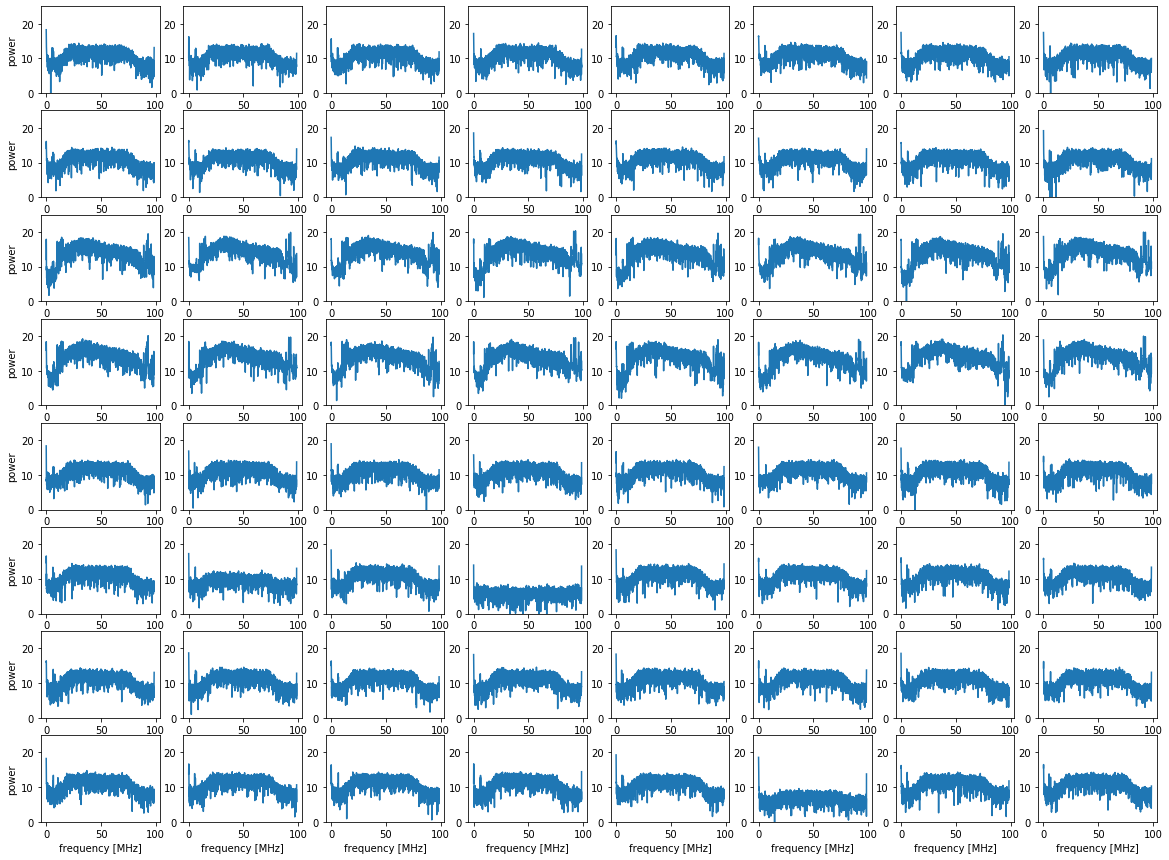

In [40]:
#plot spectra
fbins=np.linspace(0,197/2,int(1+4096/2))

plt.figure(figsize=(20,15))
for i in range(64):
    plt.subplot(8,8,1+i)
    spec=np.fft.rfft(snapshot[:,i+4])
    plt.plot(fbins,np.log(np.square(np.abs(spec))))
    plt.ylim(0,25)
    if i > 55:
        plt.xlabel('frequency [MHz]')
    if i%8==0:
        plt.ylabel('power')

## Waterfall plots

In [57]:
Nchan=2049
Nant = 64


dynamicspectra=np.zeros((Nchan,Nsnapshot,Nant))
maxtimeseries =np.zeros((Nsnapshot,Nant))
    
for j in range(Nsnapshot):
    fname=fnames[j][:-1]
    snapshot=np.load(basename+fname)
    for i in range(Nant):
        timeseries = snapshot[:,i+4]
        maxtimeseries[j,i]=np.max(np.abs(timeseries))
        spec=np.fft.rfft(timeseries)
        logpower = np.log(np.square(np.abs(spec)))
        dynamicspectra[:,j,i] = logpower


/home/ubuntu/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: RuntimeWarning: divide by zero encountered in log
  from ipykernel import kernelapp as app


1440


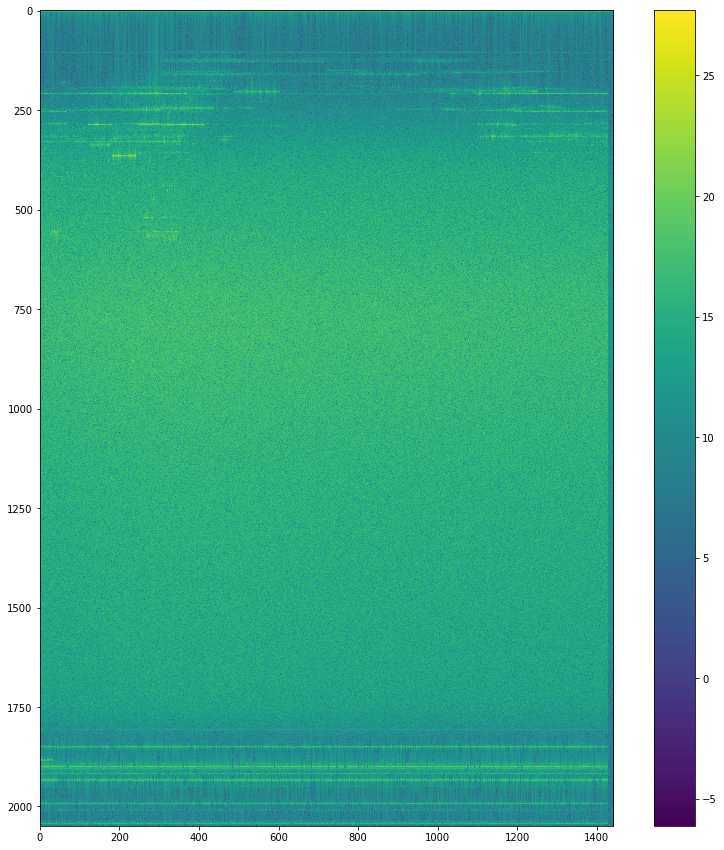

In [58]:
print(Nsnapshot)
plt.figure(figsize=(15,15))
plt.imshow(dynamicspectra[:,:,0],interpolation='None')
plt.colorbar()
plt.show()

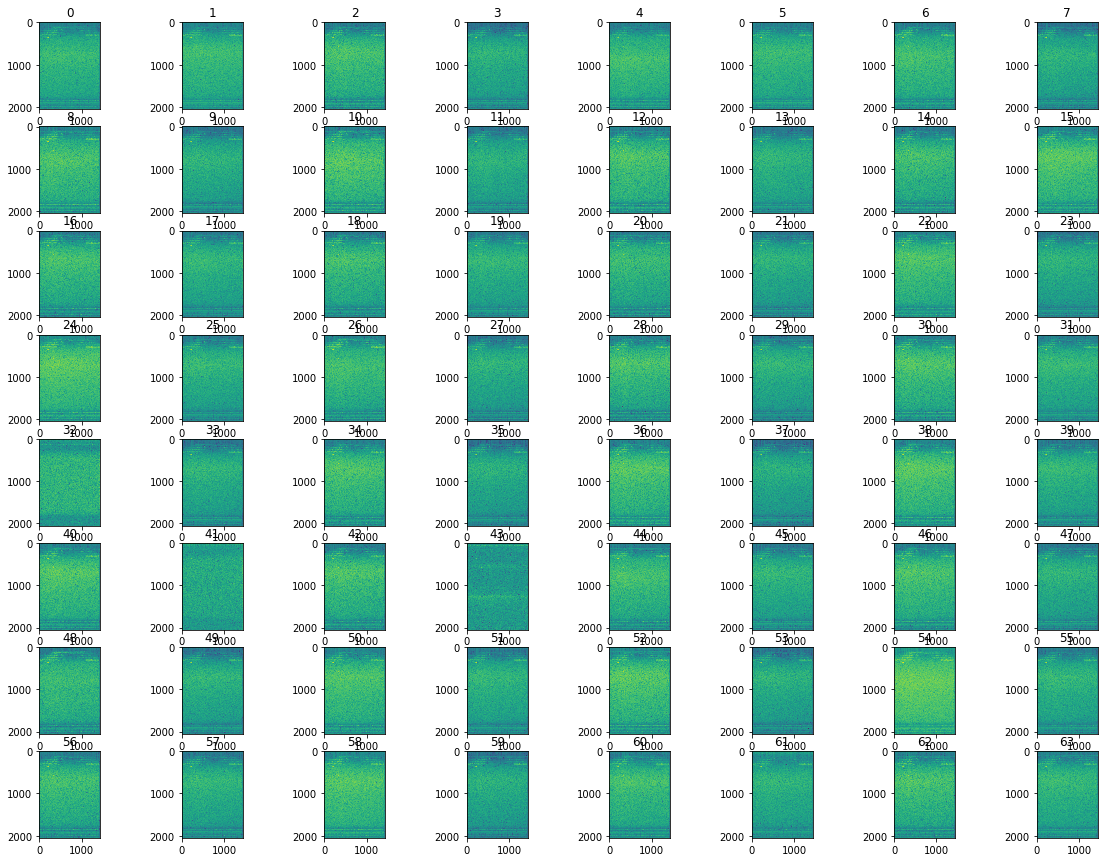

In [59]:
plt.figure(figsize=(20,15))
for i in range(64):
    plt.subplot(8,8,1+i)
    plt.imshow(dynamicspectra[:,:,i],interpolation='None')
    plt.title(i)

plt.show()
    
    

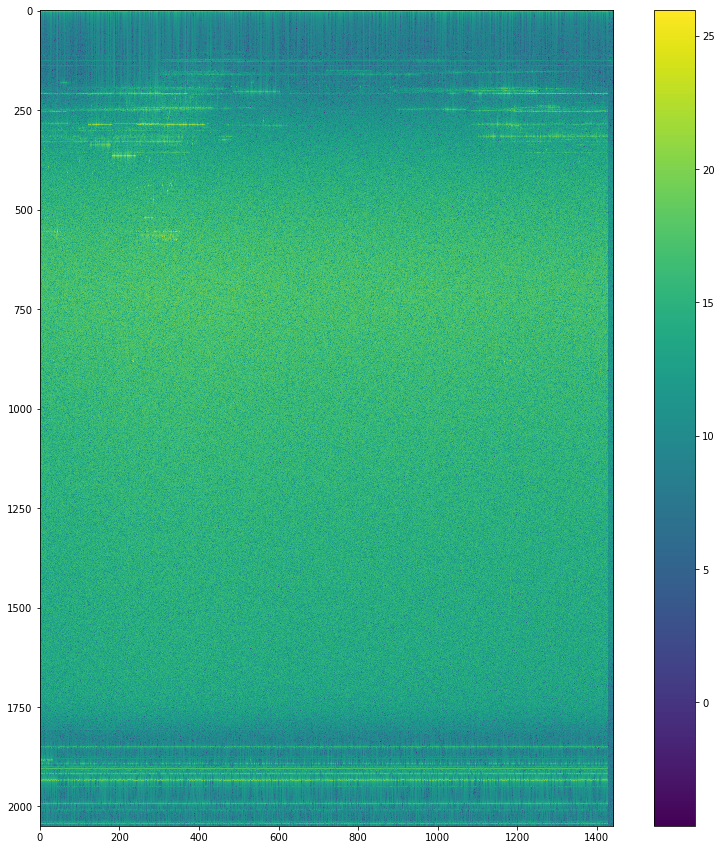

In [60]:
plt.figure(figsize=(15,15))
plt.imshow(dynamicspectra[:,:,60],interpolation='None')
plt.colorbar()

### work on time axis label

In [61]:
print( fnames[0])
fname0=fnames[0][:-1]

single_board_snapshot1634064473.0826933.npy



In [62]:
name=fname0
t=float(name[-22:-5])
utcstruct=time.gmtime(t)
print(time.asctime(utcstruct))
print(utcstruct)

Tue Oct 12 18:47:53 2021
time.struct_time(tm_year=2021, tm_mon=10, tm_mday=12, tm_hour=18, tm_min=47, tm_sec=53, tm_wday=1, tm_yday=285, tm_isdst=0)


In [63]:
(12*60) + 12 + (7/60)

732.1166666666667

Pacific time is UTC - 7.   Start time was 732.12 minutes before midnight

In [64]:
#timesteps = np.asarray(range(Nsnapshot))
#minutes_since_midnight = timesteps - 732.12
#hours_since_midnight = (1/60)*minutes_since_midnight

In [213]:
initialtimestamp = float(fnames[0][:-1][21:-4])
snapshottimes=np.zeros(Nsnapshot) #time w.r.t start of scan
for j in range(Nsnapshot):
    fname=fnames[j][:-1]
    timestamp=float(fname[21:-4])
    snapshottimes[j]=timestamp-initialtimestamp

minutes_since_midnight = ((1/60)*snapshottimes) - 732.12
hours_since_midnight = (1/60)*minutes_since_midnight
hours_since_midnight_old = (1/60)*(np.asarray(range(Nsnapshot)) - 732.12)


(1440,)

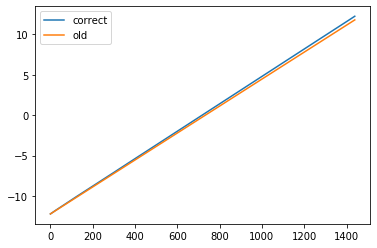

In [214]:
plt.plot(hours_since_midnight,label='correct')
plt.plot(hours_since_midnight_old,label='old')
plt.legend()
np.shape(hours_since_midnight)

## Timeseries standard deviation over time

In [65]:
Nant = 64


sdevs=np.zeros((Nsnapshot,Nant))
    
for j in range(Nsnapshot):
    fname=fnames[j][:-1]
    snapshot=np.load(basename+fname)
    for i in range(Nant):
        sdevs[j,i]=np.std(snapshot[:,i+4])
     

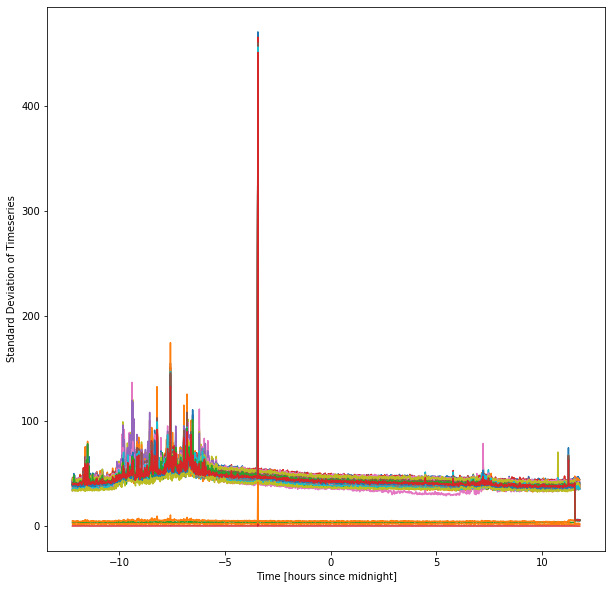

In [66]:
plt.figure(figsize=(10,10))
for i in range(64):
    plt.plot(hours_since_midnight,sdevs[:,i])
    plt.xlabel("Time [hours since midnight]")
    plt.ylabel("Standard Deviation of Timeseries")
plt.show()

The pink spike at time index 1165 is not the same pink antenna that was lower power leading up to it. That is a coincidence of the re-use of colors.

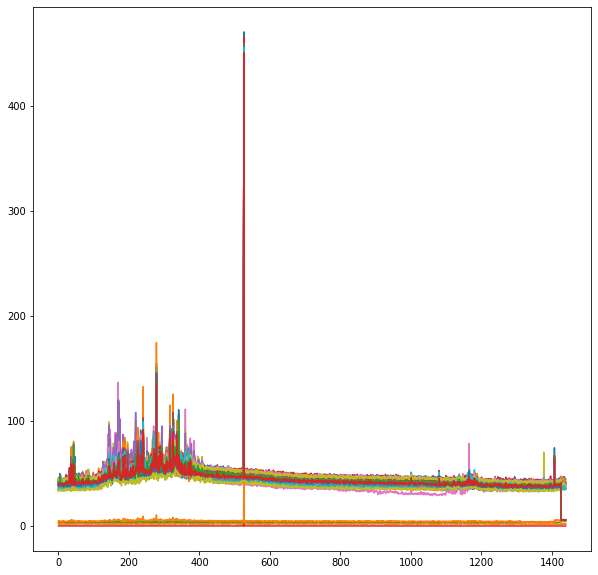

In [139]:
plt.figure(figsize=(10,10))
for i in range(64):
    plt.plot(sdevs[:,i])
plt.show()

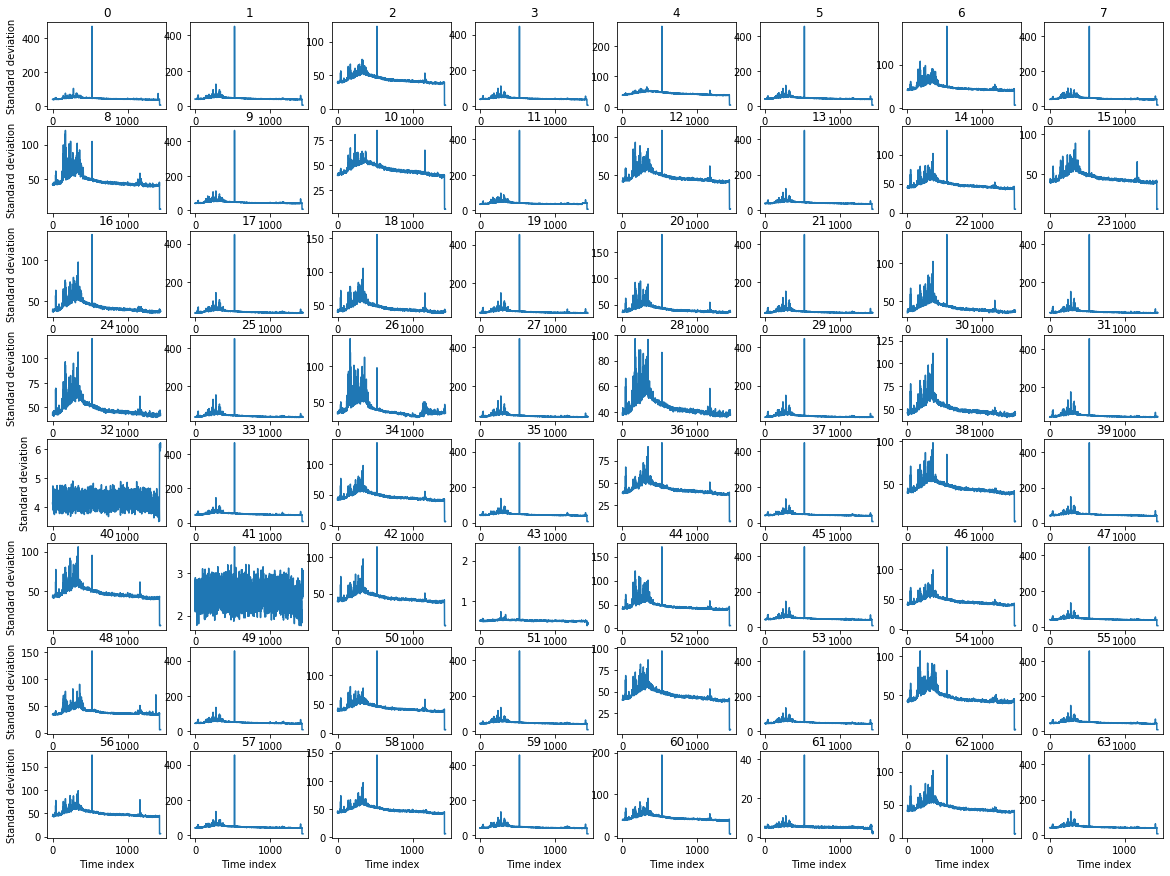

In [140]:
plt.figure(figsize=(20,15))
for i in range(64):
    plt.subplot(8,8,1+i)
    plt.plot(sdevs[:,i])
    plt.title(str(i))
    if i > 55:
        plt.xlabel('Time index')
    if i%8==0:
        plt.ylabel('Standard deviation')


## Kurtosis
Fourth moment divided by variance squared.  Scipy is using Fisher definition which then subtracts 3, such that the result is zero for a Gaussian distribution.

In [87]:
kurtosis=np.zeros((Nsnapshot,Nant))
    
for j in range(Nsnapshot):
    fname=fnames[j][:-1]
    snapshot=np.load(basename+fname)
    for i in range(Nant):
        kurtosis[j,i]=st.kurtosis(snapshot[:,i+4])

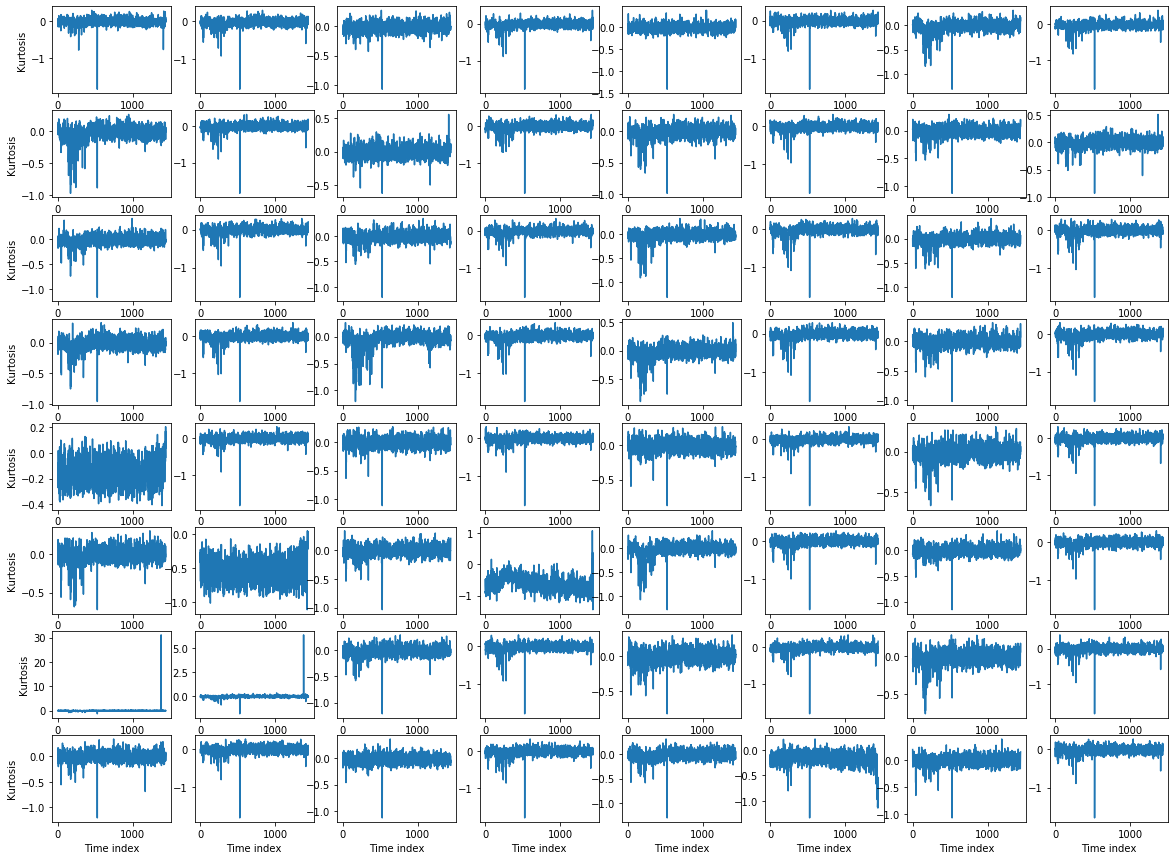

In [88]:
#plt.figure(figsize=(10,10))
#for i in range(64):
#    plt.plot(kurtosis[:,i])
#plt.show()

plt.figure(figsize=(20,15))
for i in range(64):
    plt.subplot(8,8,1+i)
    plt.plot(kurtosis[:,i])
    if i > 55:
        plt.xlabel('Time index')
    if i%8==0:
        plt.ylabel('Kurtosis')

Two antennas stand out for kurtosis at the end.

## Skewness

In [89]:
skewness=np.zeros((Nsnapshot,Nant))
    
for j in range(Nsnapshot):
    fname=fnames[j][:-1]
    snapshot=np.load(basename+fname)
    for i in range(Nant):
        skewness[j,i]=st.skew(snapshot[:,i+4])

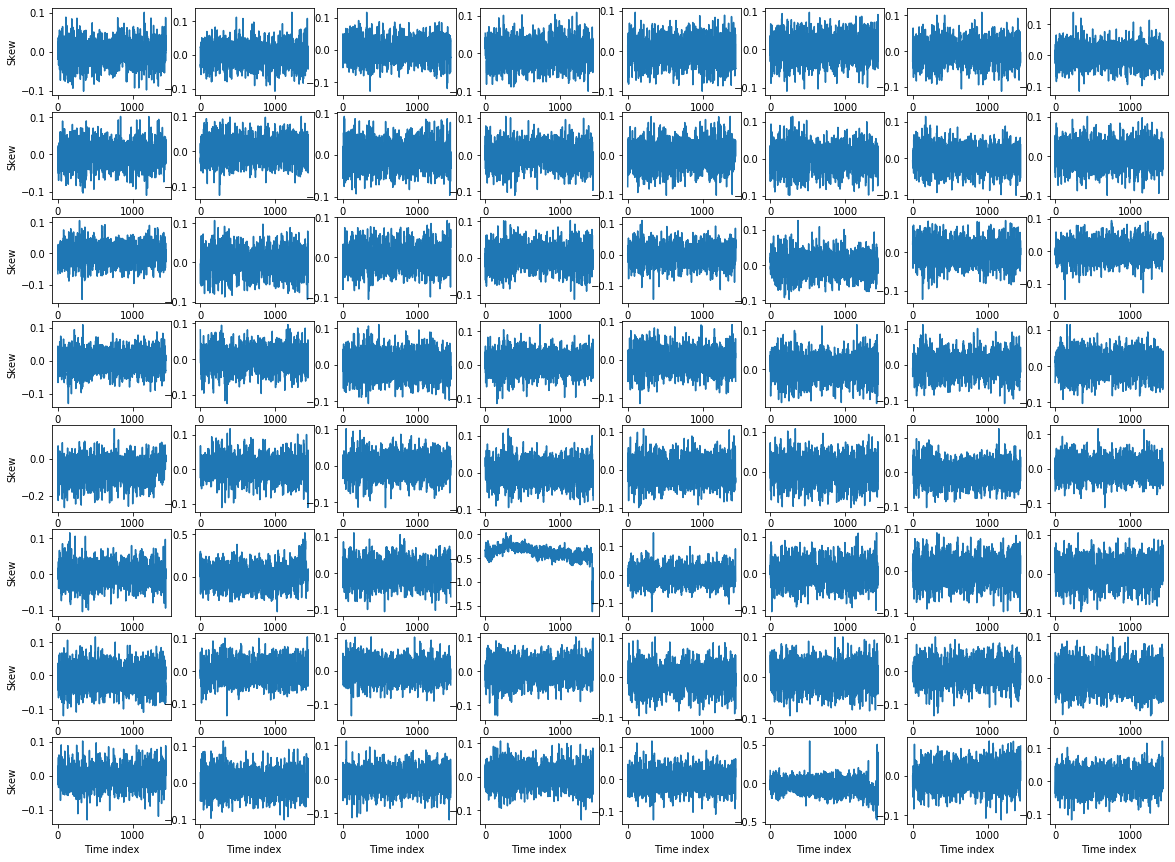

In [71]:
plt.figure(figsize=(20,15))
for i in range(64):
    plt.subplot(8,8,1+i)
    plt.plot(skewness[:,i])
    if i > 55:
        plt.xlabel('Time index')
    if i%8==0:
        plt.ylabel('Skew')

## Examine antenna 11 (215A), which stood out in skewness and kurtosis plots first time:

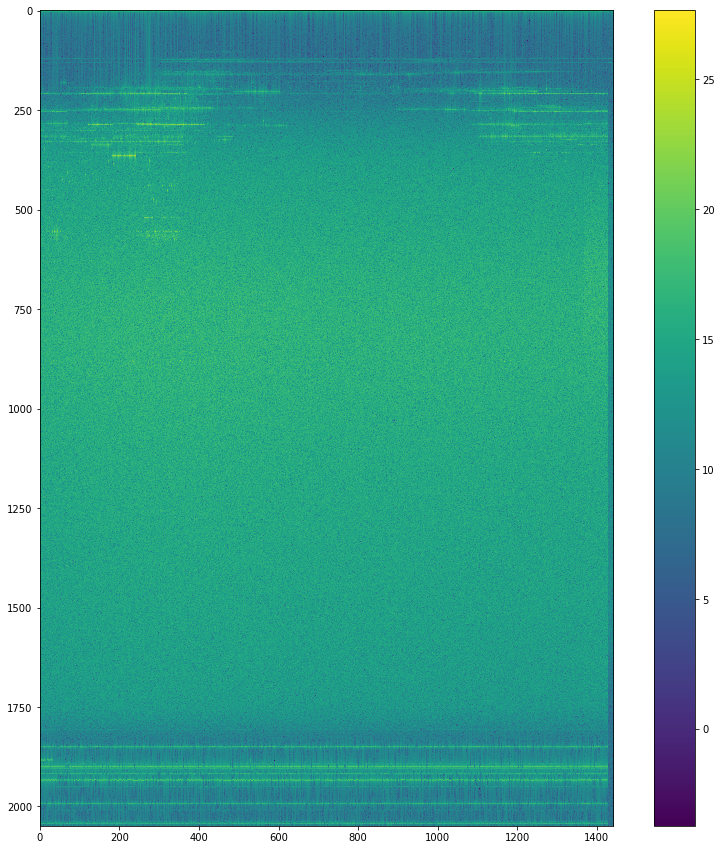

In [72]:
plt.figure(figsize=(15,15))
plt.imshow(dynamicspectra[:,:,11],interpolation='None')
plt.colorbar()


## How often are there saturated snapshots?

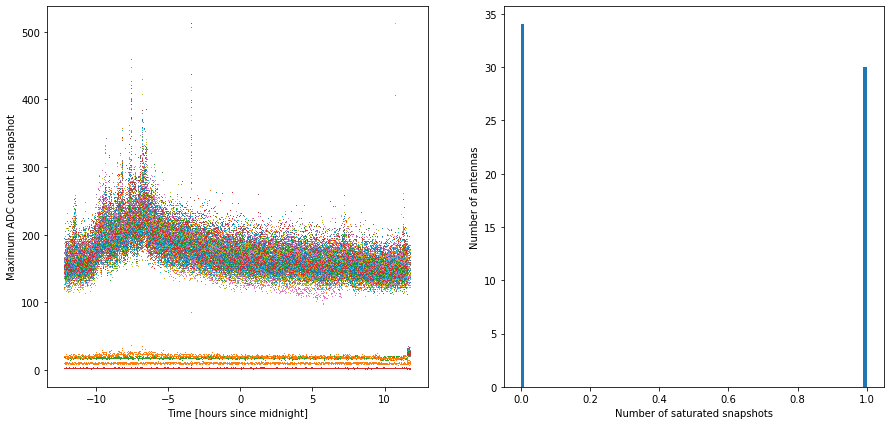

In [75]:
plt.figure(figsize=(15,7))

saturation=[]
plt.subplot(121)
plt.ylabel("Maximum ADC count in snapshot")
plt.xlabel("Time [hours since midnight]")
for i in range(64):
    plt.plot(hours_since_midnight,maxtimeseries[:,i],',')
    countsat=0
    for j in range(len(maxtimeseries)):
        if maxtimeseries[j,i]>=511:
            countsat+=1
    saturation.append(countsat)

    
plt.subplot(122)
plt.hist(saturation,100)
plt.xlabel("Number of saturated snapshots")
plt.ylabel("Number of antennas")
plt.show()
    

In [165]:
maxtimeseries[526,i]>=511

True

About half the antennas never saturated and half saturated once.

## Filter

Filter from 21.64306640625 to 81.7626953125MHz


/home/ubuntu/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: divide by zero encountered in log
  # This is added back by InteractiveShellApp.init_path()
/home/ubuntu/anaconda3/lib/python3.7/site-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


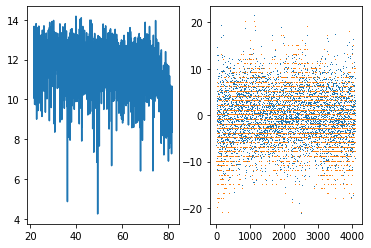

In [77]:
fbins=np.linspace(0,197/2,int(1+4096/2))
print("Filter from " + str(fbins[450]) + ' to ' + str(fbins[1700]) + "MHz" )
tophat=np.zeros(len(spectrum))
tophat[450:1700] = 1
filteredspectrum=tophat*spectrum
filteredtimeseries=np.fft.irfft(filteredspectrum)


plt.figure()
plt.subplot(121)
plt.plot(fbins,np.log(np.square(filteredspectrum)))

plt.subplot(122)
plt.plot(filteredtimeseries,',')
plt.plot(timeseries,',')



In [83]:
Nchan=2049
Nant = 64


fsdevs=np.zeros((Nsnapshot,Nant))
fskewness=np.zeros((Nsnapshot,Nant))
fkurtosis=np.zeros((Nsnapshot,Nant))

for j in range(Nsnapshot):
    fname=fnames[j][:-1]
    snapshot=np.load(basename+fname)
    for i in range(Nant):
        timeseries=snapshot[:,i+4]
        spectrum=np.fft.rfft(timeseries)
        filteredspectrum=tophat*spectrum
        filteredtimeseries=np.fft.irfft(filteredspectrum)
        fsdevs[j,i]=np.std(filteredtimeseries)
        fskewness[j,i]=st.skew(filteredtimeseries)
        fkurtosis[j,i]=st.kurtosis(filteredtimeseries)

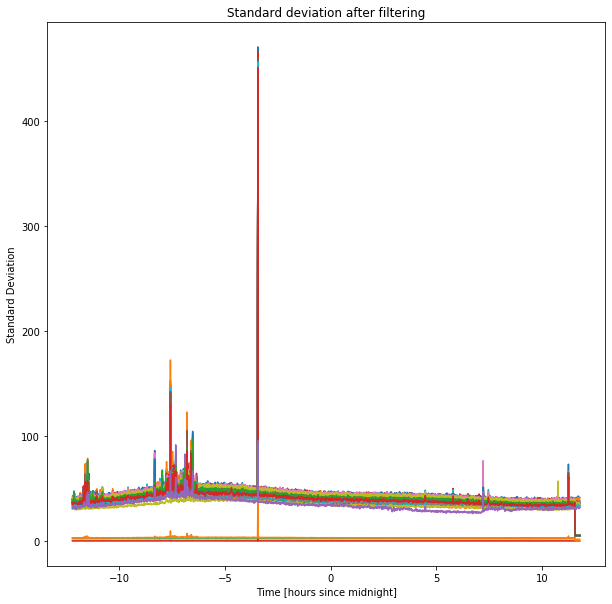

In [154]:
plt.figure(figsize=(10,10))
plt.title("Standard deviation after filtering")
for i in range(64):
    plt.plot(hours_since_midnight,fsdevs[:,i])
    plt.ylabel("Standard Deviation")
    plt.xlabel("Time [hours since midnight]")

plt.show()


Less complicated plot for NSF proposal

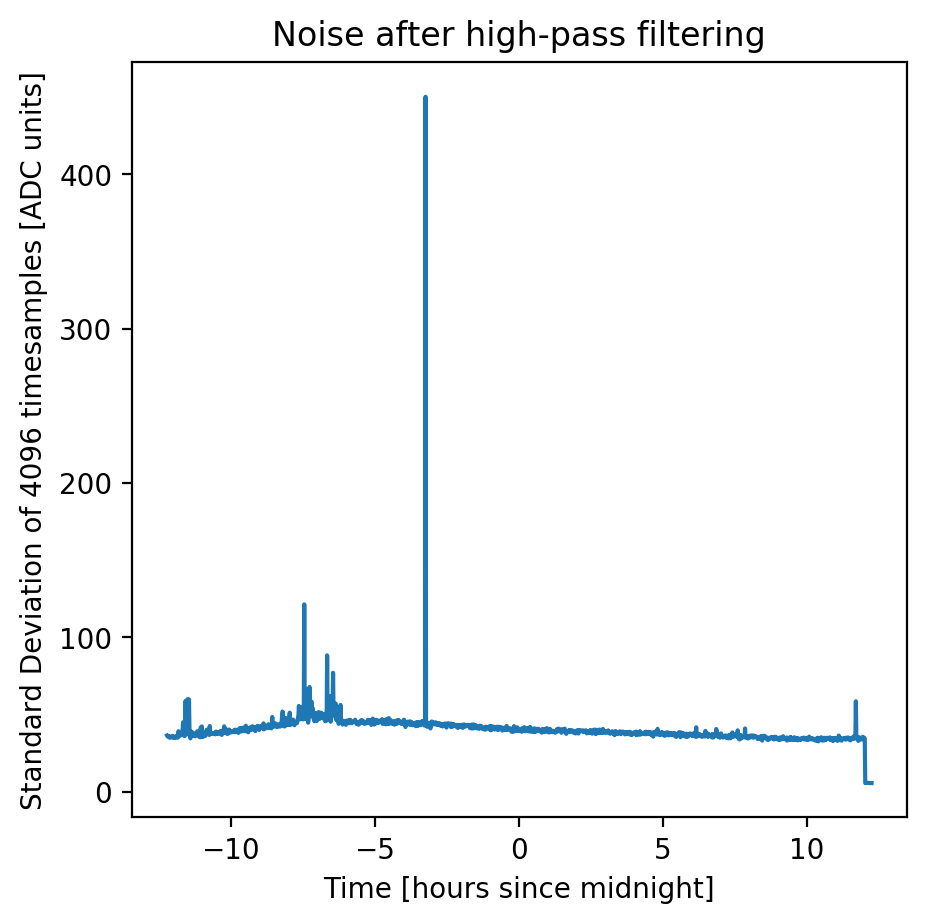

In [219]:
plt.figure(figsize=(5,5),dpi=200)
plt.title("Noise after high-pass filtering")
i=1 #one example antenna
plt.plot(hours_since_midnight,fsdevs[:,i])
plt.ylabel("Standard Deviation of 4096 timesamples [ADC units]")
plt.xlabel("Time [hours since midnight]")
#plt.savefig('24hour.png')
plt.show()

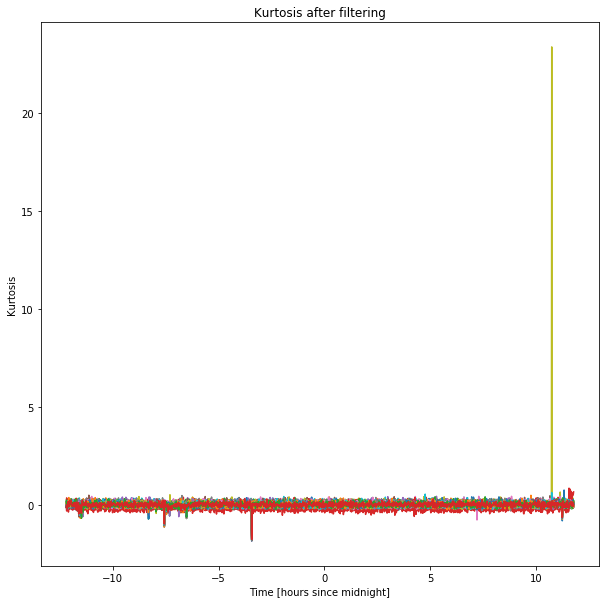

In [85]:
plt.figure(figsize=(10,10))
plt.title("Kurtosis after filtering")
plt.ylabel("Kurtosis")
plt.xlabel("Time [hours since midnight]")
for i in range(64):
    plt.plot(hours_since_midnight,fkurtosis[:,i])
    
plt.show()

Compare to kurtosis before filtering


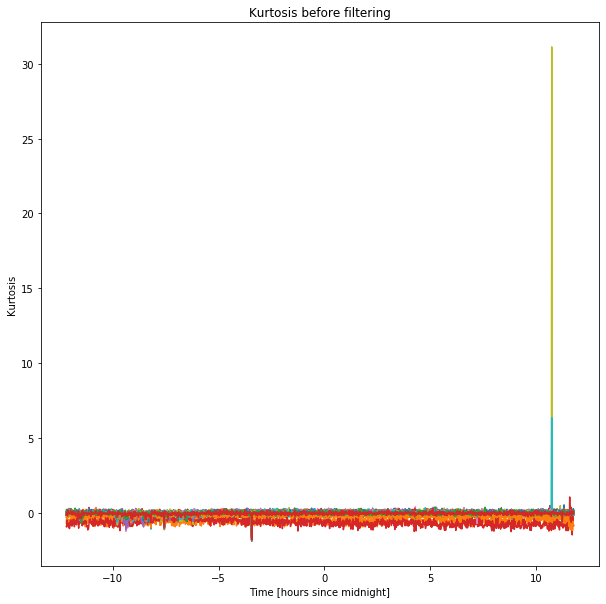

In [86]:
plt.figure(figsize=(10,10))
plt.title("Kurtosis before filtering")
plt.ylabel("Kurtosis")
plt.xlabel("Time [hours since midnight]")
for i in range(64):
    plt.plot(hours_since_midnight,kurtosis[:,i])
    
plt.show()

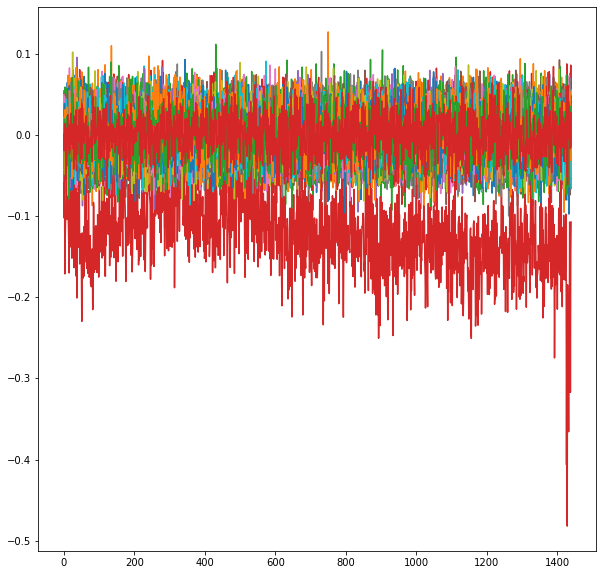

In [90]:
plt.figure(figsize=(10,10))
for i in range(64):
    plt.plot(fskewness[:,i])
plt.show()

## Inspect the events and antennas that stand out 

big spike is time index 526 = Tuesday October 12 8:45pm (pacific time)

time at the end when most antennas fall off is 1426 = 12:00:53 pm Wednesday October 14 (Pacific time)

Antennas 48(digital input 63, antenna 247B) and 49 ((digital input 62, antenna 247A) stand out for kurtosis at 1377  11:10:46 am Wednesday October 13 (Pacific time).

Antennas with reliably low power are:

32(digital input 47, antenna 239B), 

41(digital input 38, antenna 235A), 

43 (digital input 36, antenna 236A), 

61(digital input 50, antenna 241A).

Antenna 26 has lower standard deviation (digital input 21, antenna 228 B).


In [119]:
fname=fnames[1377][:-1]
t=float(fname[-22:-5])
utcstruct=time.gmtime(t)
print(time.asctime(utcstruct))
print(utcstruct)

Wed Oct 13 18:10:46 2021
time.struct_time(tm_year=2021, tm_mon=10, tm_mday=13, tm_hour=18, tm_min=10, tm_sec=46, tm_wday=2, tm_yday=286, tm_isdst=0)


In [178]:
#This snapshot was recorded sending a constant for each timeseries.  
#I can use this to look up which order the antennas are in
indexsnapshot = np.load("snapshots/temp/single_board_snapshot1631823914.5523858.npy")
for antennaindex in [48, 49, 61, 32, 41, 43, 26]:
    print(antennaindex, indexsnapshot[0,antennaindex+4])



48 63.0
49 62.0
61 50.0
32 47.0
41 38.0
43 36.0
26 21.0


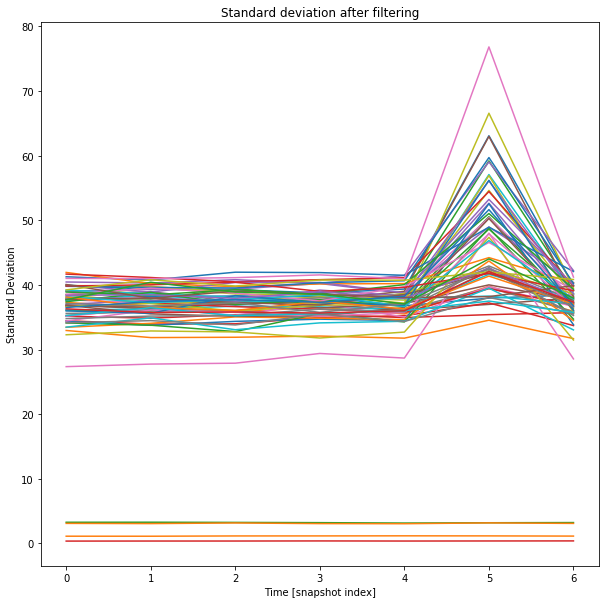

In [129]:

plt.figure(figsize=(10,10))
plt.title("Standard deviation after filtering")
for i in range(64):
    plt.plot(fsdevs[1160:1167,i])
    plt.ylabel("Standard Deviation")
    plt.xlabel("Time [snapshot index]")
plt.show()

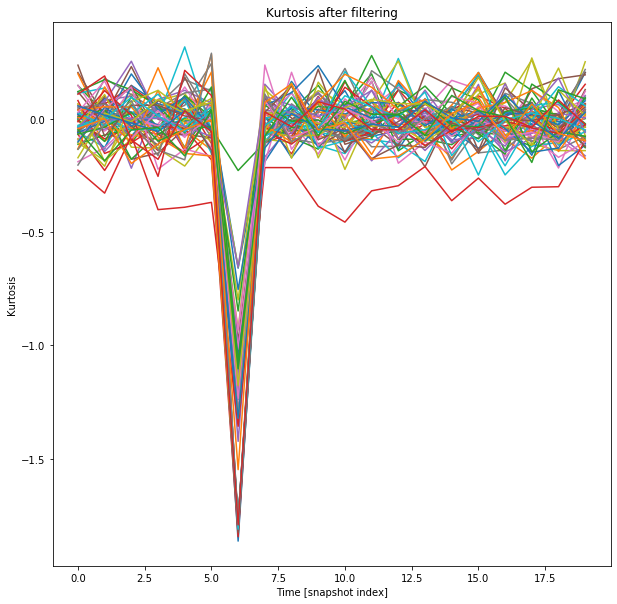

In [99]:
#big kurtosis time is 526 for most antennas

plt.figure(figsize=(10,10))
plt.title("Kurtosis after filtering")
plt.ylabel("Kurtosis")
plt.xlabel("Time [snapshot index]")
for i in range(64):
    plt.plot(fkurtosis[520:540,i])
    
plt.show()

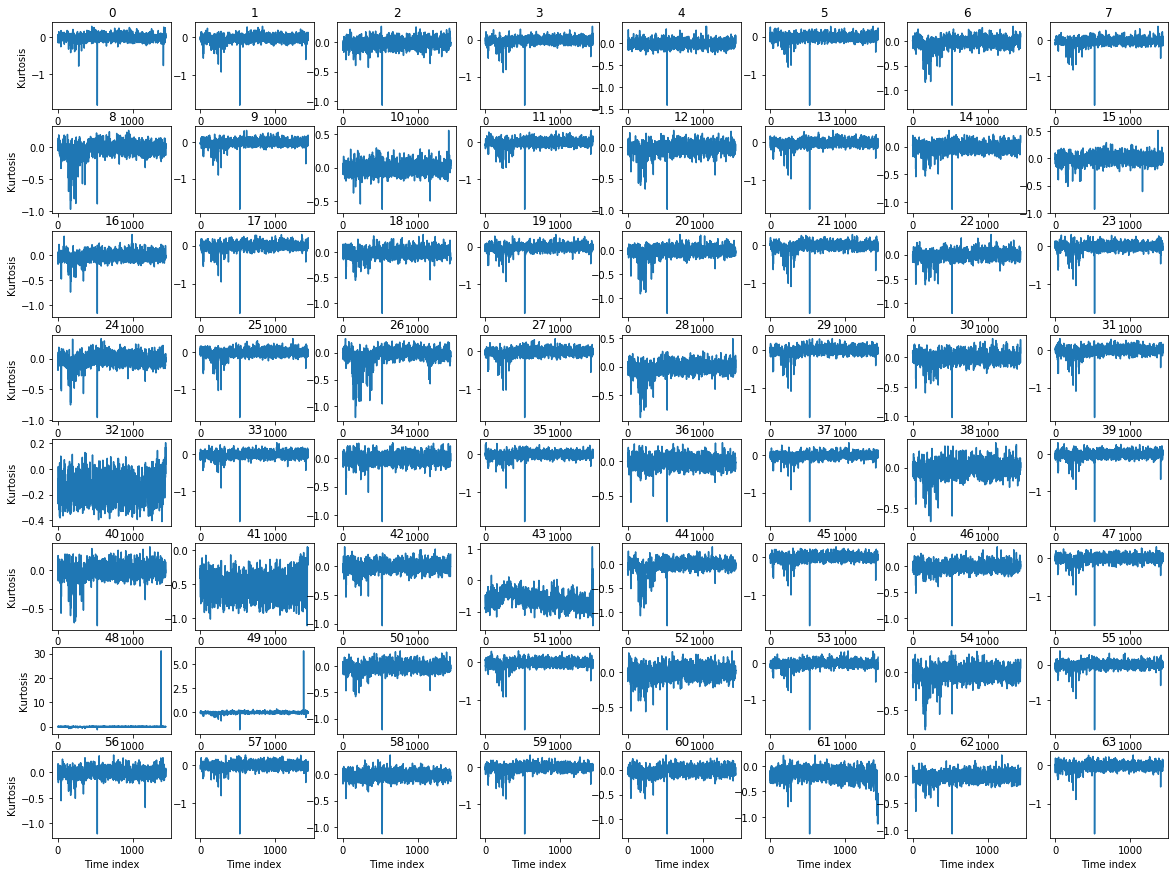

In [155]:
#big kurtosis antennas are 48 and 49
plt.figure(figsize=(20,15))
for i in range(64):
    plt.subplot(8,8,1+i)
    plt.plot(kurtosis[:,i])
    plt.title(i)
    if i > 55:
        plt.xlabel('Time index')
    if i%8==0:
        plt.ylabel('Kurtosis')

512.0


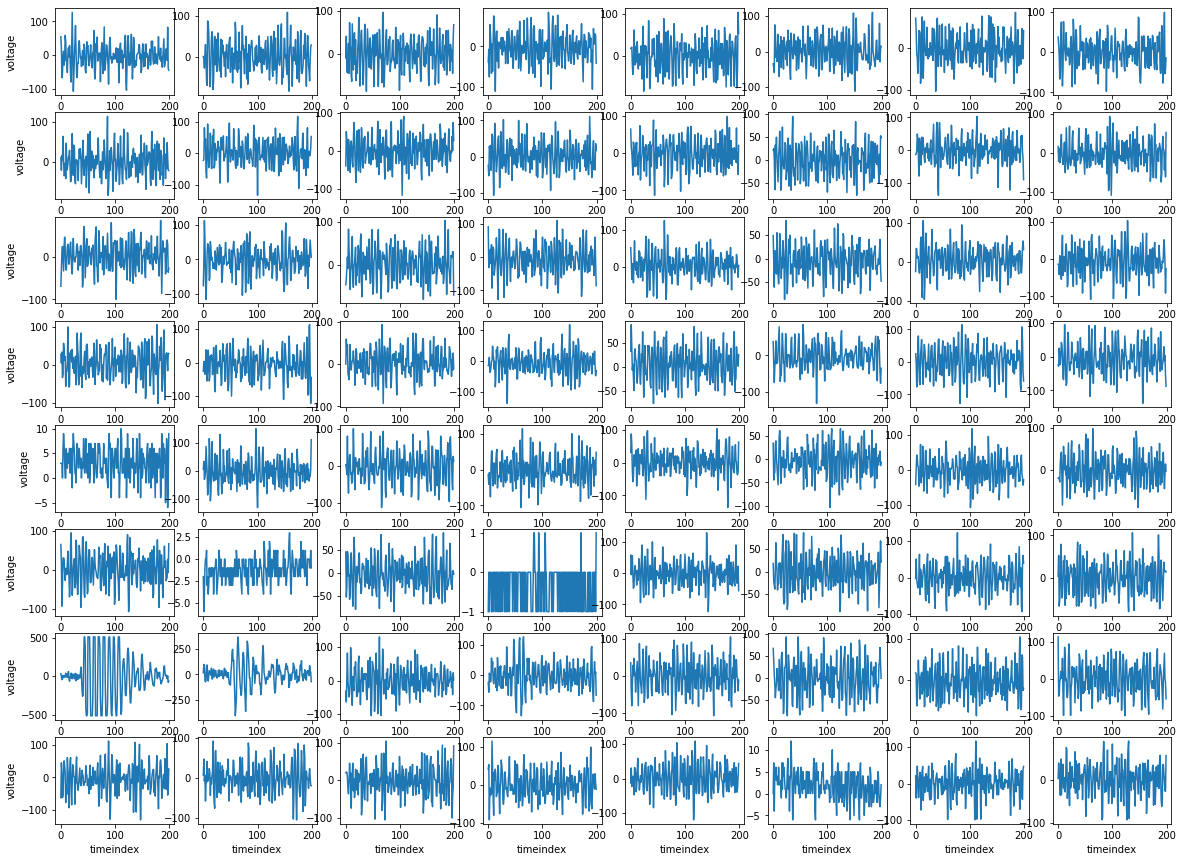

In [177]:
#histograms, spectra, timeseries at 526, 1426, 1377

timeindex=1377
fname=fnames[timeindex][:-1]
snapshot=np.load(basename+fname)

#plot histogram
plt.figure(figsize=(20,15))
for i in range(64):
    plt.subplot(8,8,1+i)
    timeseries=snapshot[200:400,i+4]
    
    plt.plot(timeseries,)
    if i > 55:
        plt.xlabel('timeindex')
    if i%8==0:
        plt.ylabel('voltage')
print(np.max(np.abs(snapshot[:,48+4])))

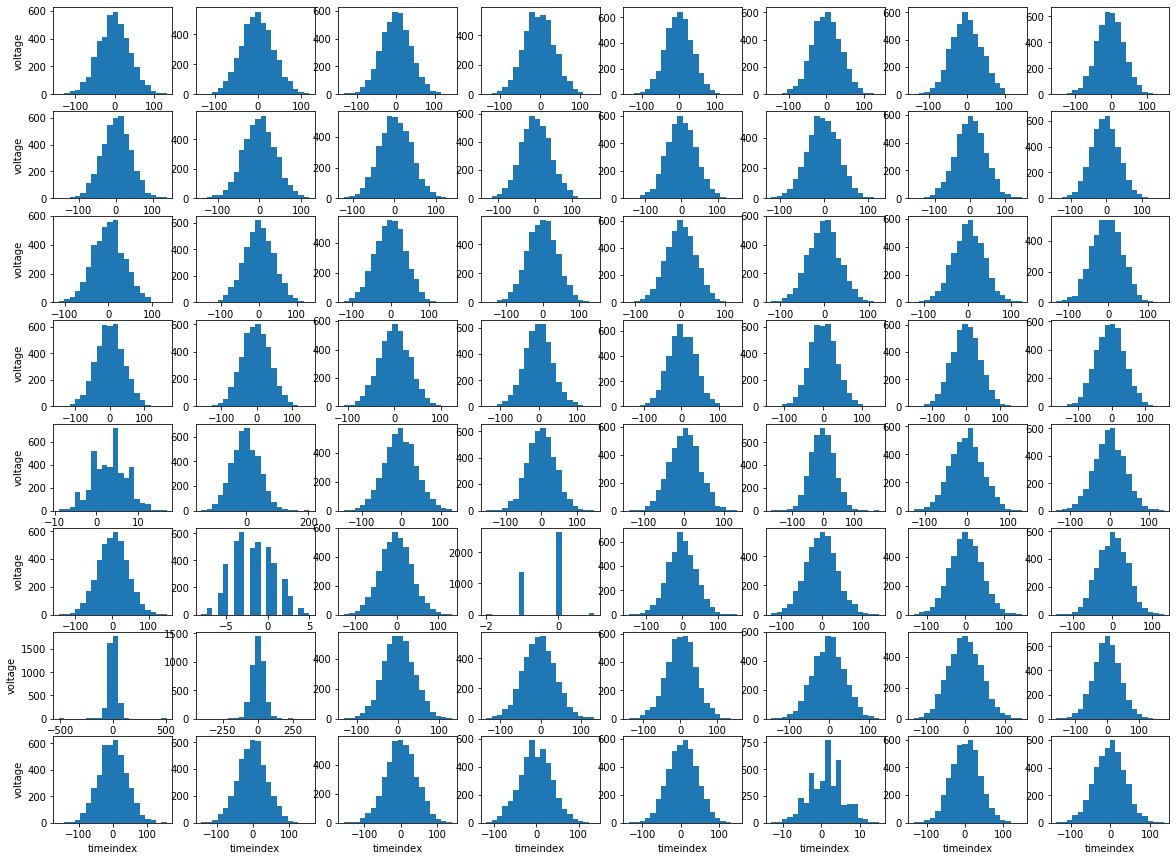

In [180]:
fname=fnames[timeindex][:-1]
snapshot=np.load(basename+fname)

#plot histogram
plt.figure(figsize=(20,15))
for i in range(64):
    plt.subplot(8,8,1+i)
    timeseries=snapshot[:,i+4]
    
    plt.hist(timeseries,20)
    if i > 55:
        plt.xlabel('timeindex')
    if i%8==0:
        plt.ylabel('voltage')

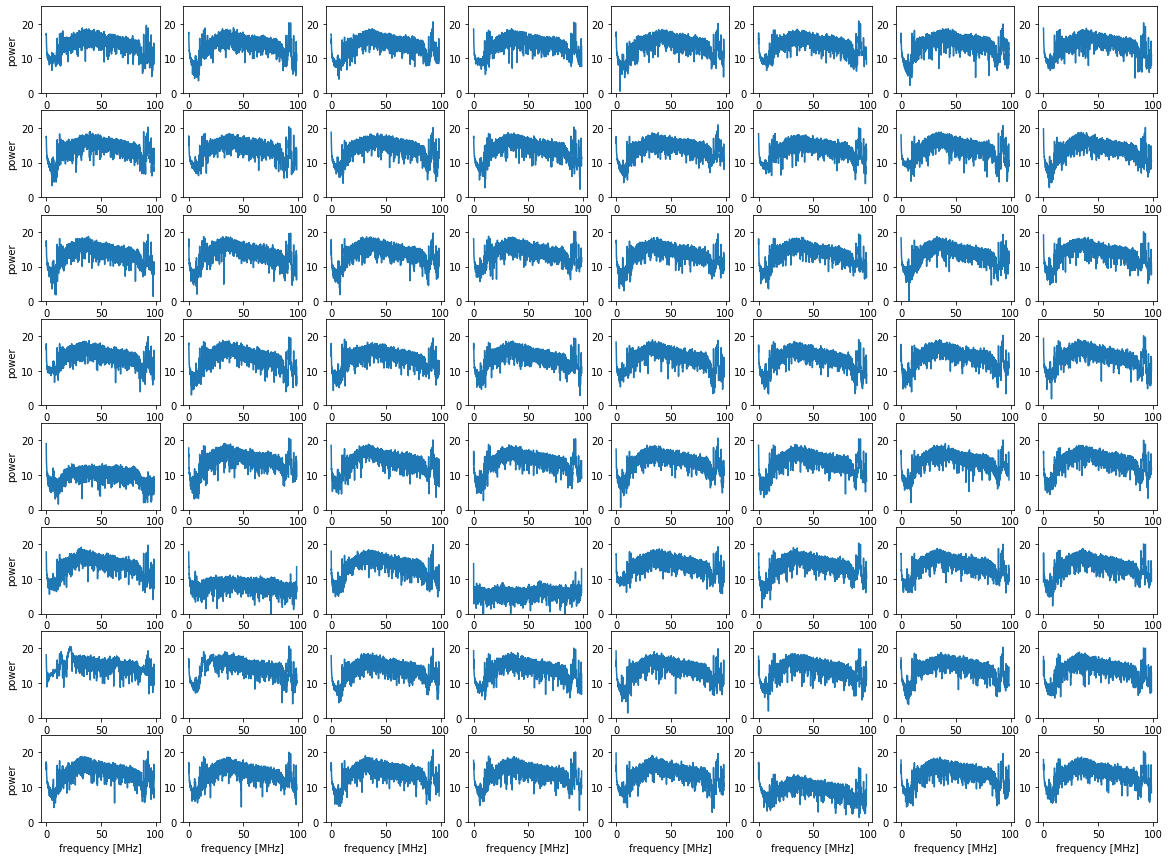

In [171]:
#plot spectra
fbins=np.linspace(0,197/2,int(1+4096/2))

plt.figure(figsize=(20,15))
for i in range(64):
    plt.subplot(8,8,1+i)
    spec=np.fft.rfft(snapshot[:,i+4])
    plt.plot(fbins,np.log(np.square(np.abs(spec))))
    plt.ylim(0,25)
    if i > 55:
        plt.xlabel('frequency [MHz]')
    if i%8==0:
        plt.ylabel('power')

## Low frequency ripple


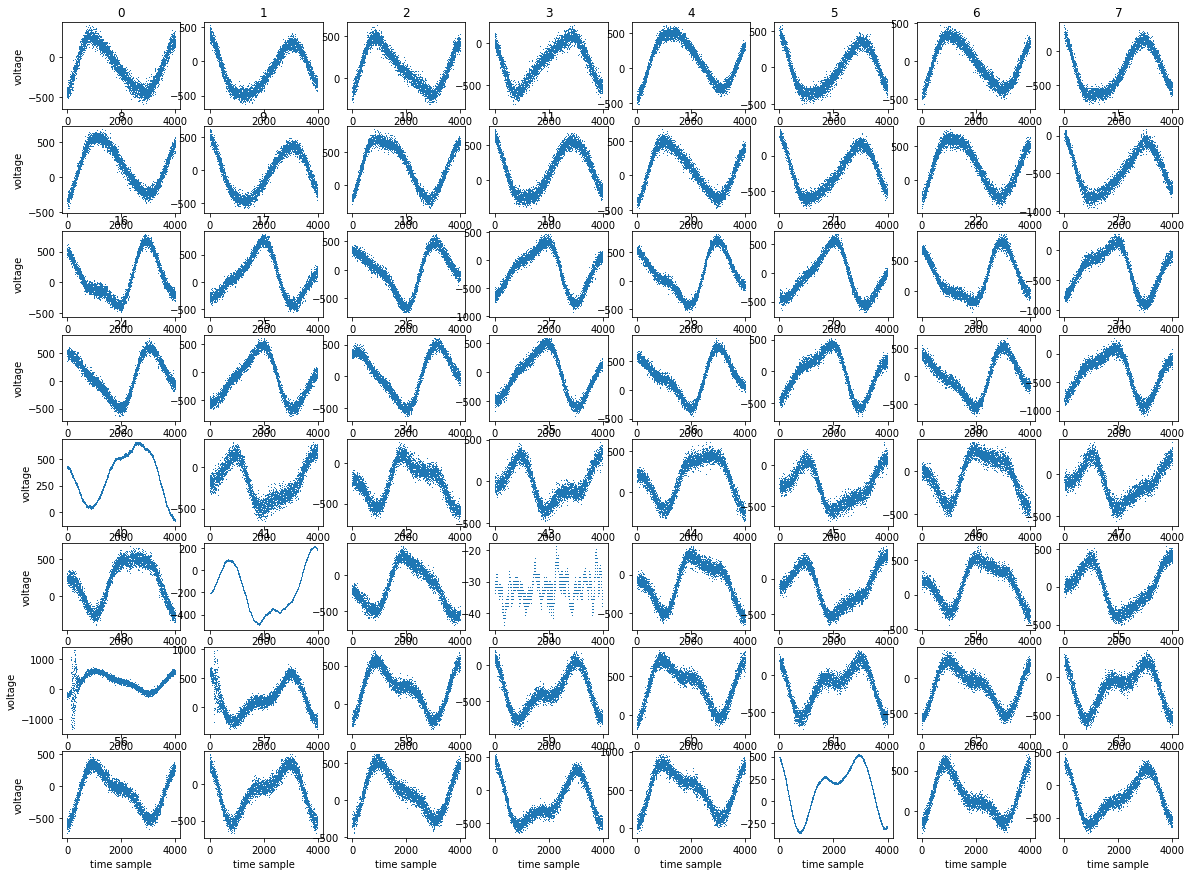

In [181]:
snapshot=np.load(basename + fname)
ntap=100
#plot histogram
plt.figure(figsize=(20,15))
for i in range(64):
    plt.subplot(8,8,1+i)
    plt.title(i)
    timeseries = snapshot[:,i+4]
    
    sm = timeseries[:-ntap]
    count=1
    while count < ntap:
        sm=sm +timeseries[count:-1*(ntap-count)]
        count+=1
    plt.plot(sm,',')
    if i > 55:
        plt.xlabel('time sample')
    if i%8==0:
        plt.ylabel('voltage')

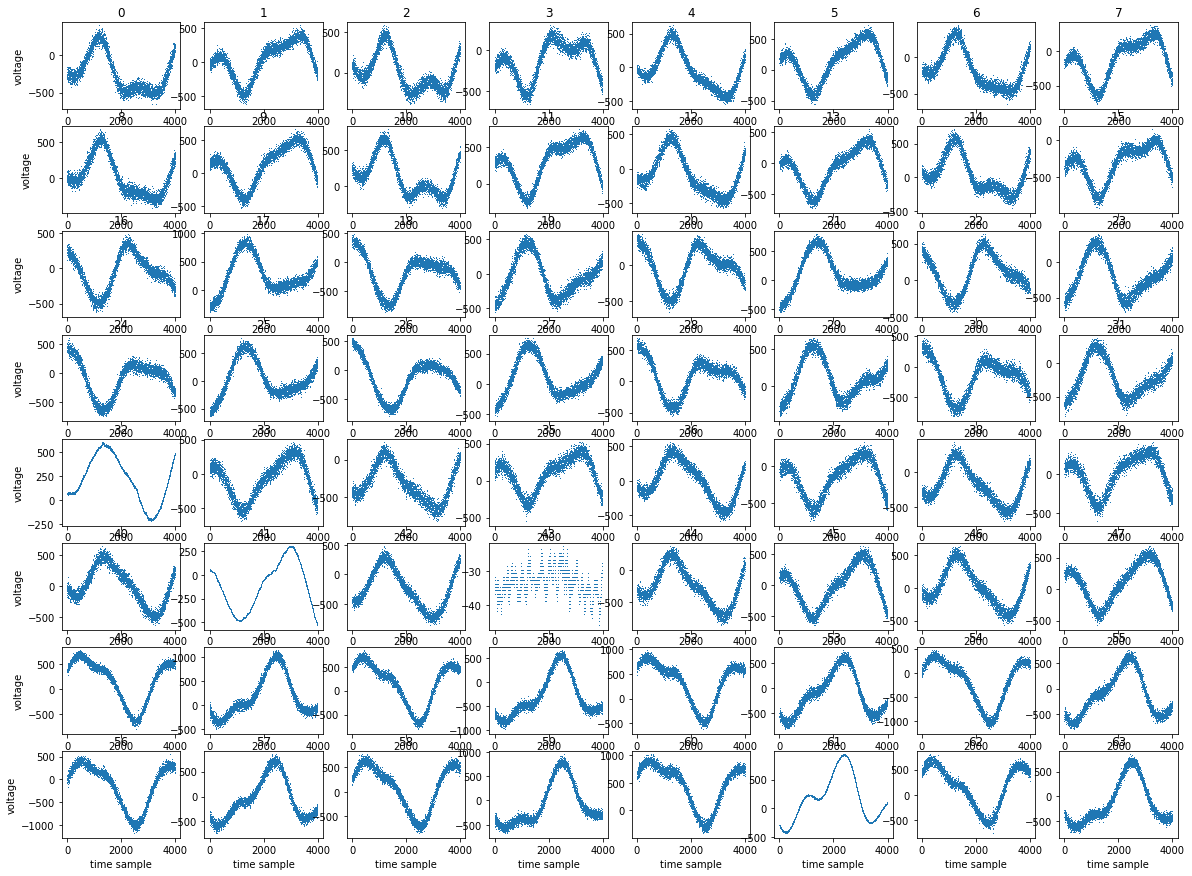

In [183]:
timeindex= 0
fname=fnames[timeindex][:-1]
snapshot=np.load(basename+fname)
ntap=100
plt.figure(figsize=(20,15))
for i in range(64):
    plt.subplot(8,8,1+i)
    plt.title(i)
    timeseries = snapshot[:,i+4]
    
    sm = timeseries[:-ntap]
    count=1
    while count < ntap:
        sm=sm +timeseries[count:-1*(ntap-count)]
        count+=1
    plt.plot(sm,',')
    if i > 55:
        plt.xlabel('time sample')
    if i%8==0:
        plt.ylabel('voltage')

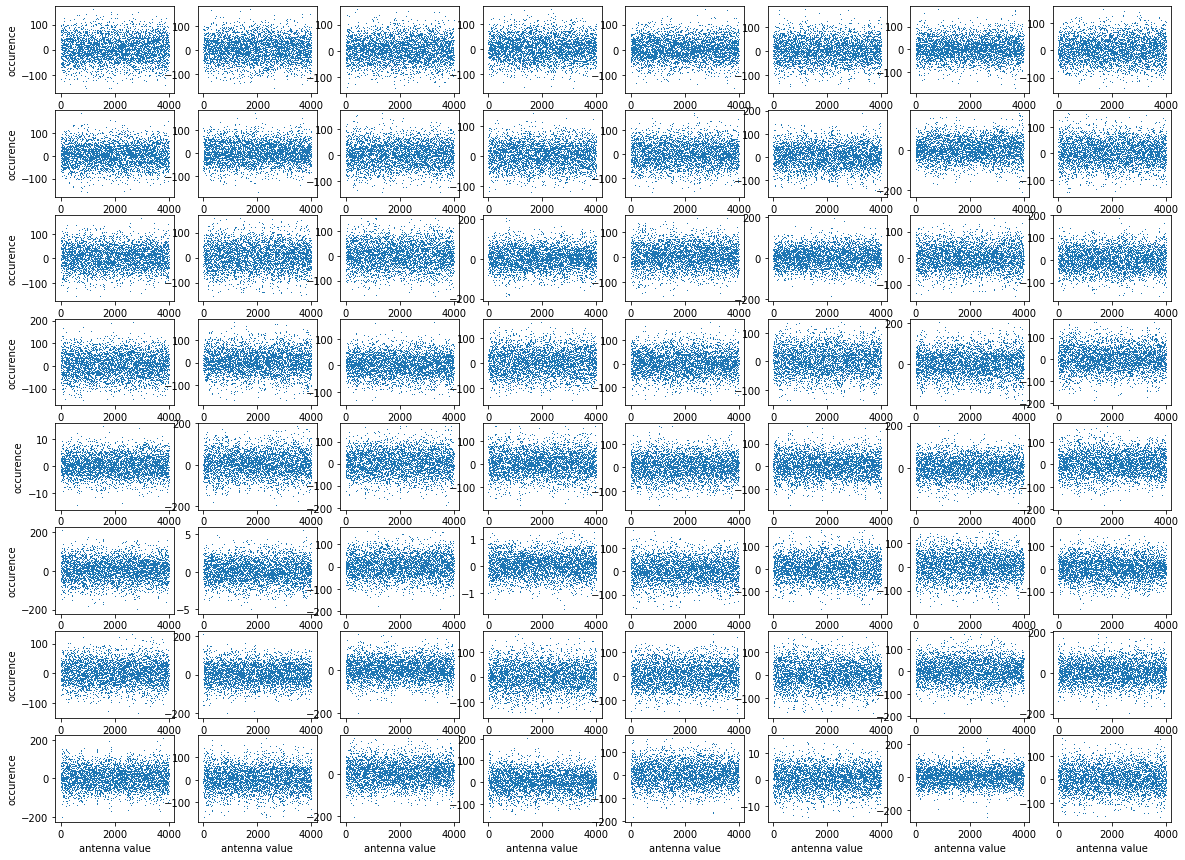

In [185]:
timeindex= 0
fname=fnames[timeindex][:-1]
snapshot=np.load(basename+fname)
ntap=100
plt.figure(figsize=(20,15))
for i in range(64):
    plt.subplot(8,8,1+i)
    timeseries=snapshot[:,i+4]
    spectrum=np.fft.rfft(timeseries)
    filteredspectrum=tophat*spectrum
    filteredtimeseries=np.fft.irfft(filteredspectrum)
        
    sm = filteredtimeseries[:-ntap]
    count=1
    while count < ntap:
        sm=sm +filteredtimeseries[count:-1*(ntap-count)]
        count+=1
    plt.plot(sm,',')

    if i > 55:
        plt.xlabel('antenna value')
    if i%8==0:
        plt.ylabel('occurence')
    #print(st.kurtosis(filteredtimeseries))

0.1923828125
196.8076171875
394.1923828125
590.8076171875
788.1923828125
984.8076171875
1182.1923828125
1378.8076171875
1576.1923828125
1772.8076171875
